In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
from skimage.io import imread #read images from files
import os
import keras.backend as K
import tensorflow as tf

In [5]:
base_tile_dir = '/kaggle/input/histopathologic-cancer-detection/train'
df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.tif'))})
df['id'] = df.path.map(lambda x: x.split('/')[5].split(".")[0])
# df.head()
labels = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")
df = df.merge(labels, on = "id")
df.head(10)


,path,id,label
0,/kaggle/input/histopathologic-cancer-detection...,d43c081bafa286f9c1f7e921883f26ceafebc912,1
1,/kaggle/input/histopathologic-cancer-detection...,092d0eedebce504847715ee046b6ad74b57599b4,0
2,/kaggle/input/histopathologic-cancer-detection...,b0d2582c6218a8764323fc940b41312282b99bf4,0
3,/kaggle/input/histopathologic-cancer-detection...,187c99df762f13f99818e5593d4bab4c6577e7e3,1
4,/kaggle/input/histopathologic-cancer-detection...,7c5270c83837de5a5cbb2dca511559dc39d19d53,1
5,/kaggle/input/histopathologic-cancer-detection...,5a32933e093185f5fc91d30fc83ad571c6818d25,1
6,/kaggle/input/histopathologic-cancer-detection...,42e77d193e73811e0bb65a0cbd9b01c5c27900fa,0
7,/kaggle/input/histopathologic-cancer-detection...,27bb898f54a0b9345f6c4a9083299e4465860861,0
8,/kaggle/input/histopathologic-cancer-detection...,89cd55e4300440612347c38f306da688a166fd40,0
9,/kaggle/input/histopathologic-cancer-detection...,cd600f77aa2af7c93dc6cd836e44edada3d8c403,0


In [6]:
df.shape

(220025, 3)

In [7]:
df.label.value_counts(normalize=True)

label
0    0.594969
1    0.405031
Name: proportion, dtype: float64

In [8]:
df0 = df[df.label == 0].sample(10000, random_state = 42)
df1 = df[df.label == 1].sample(10000, random_state = 42)
df = pd.concat([df0, df1], ignore_index=True).reset_index()
df = df[["path", "id", "label"]]
df.sample(10)

,path,id,label
6874,/kaggle/input/histopathologic-cancer-detection...,582ab1158c6babc426b56736f57e870ba3d557c0,0
11991,/kaggle/input/histopathologic-cancer-detection...,0661f2789091b87e0a7cc4cf28e46e5334d9f1fd,1
11203,/kaggle/input/histopathologic-cancer-detection...,ad7b760481a8d490809a74a8017c07e5755bfe5b,1
12096,/kaggle/input/histopathologic-cancer-detection...,0f696d8cd0a38f2b61187dd5bed23afb10f012c6,1
17832,/kaggle/input/histopathologic-cancer-detection...,0e4b412409c0594d5d1c76202d7631671535b787,1
19592,/kaggle/input/histopathologic-cancer-detection...,04c9cec1761e10d21df5731a2f6f6e3ae608e280,1
14806,/kaggle/input/histopathologic-cancer-detection...,fa5345ad0f9a068b744f2b5a17a73957f6c61f02,1
8570,/kaggle/input/histopathologic-cancer-detection...,be4a52712a7ce5009334301381da792207e85c60,0
9146,/kaggle/input/histopathologic-cancer-detection...,7cbe4386511488e0069240730ab95d546b6e8c6d,0
19820,/kaggle/input/histopathologic-cancer-detection...,bafbf18ba001e9231f150920245d81c93e062c0d,1


In [9]:
df.shape

(20000, 3)

In [10]:
df['image'] = df['path'].map(imread)
df.head()

,path,id,label,image
0,/kaggle/input/histopathologic-cancer-detection...,5e597447caa72a3678f0c7dc034cb74477880612,0,"[[[199, 172, 177], [238, 211, 216], [238, 211,..."
1,/kaggle/input/histopathologic-cancer-detection...,1cbb19ee76ffb24452bfef886c9917c53fbe87c7,0,"[[[255, 251, 255], [242, 225, 233], [250, 220,..."
2,/kaggle/input/histopathologic-cancer-detection...,761f0191f1c27715a761e86422c143e1d204ce2a,0,"[[[119, 99, 152], [29, 6, 58], [65, 38, 89], [..."
3,/kaggle/input/histopathologic-cancer-detection...,13727a24e0551ec9b5cc1a09bb6481dffb45019b,0,"[[[86, 51, 84], [47, 18, 46], [249, 224, 246],..."
4,/kaggle/input/histopathologic-cancer-detection...,8d4b17791580523e3d471b67b44bc47ee8b3e7ac,0,"[[[182, 111, 167], [192, 132, 183], [205, 163,..."


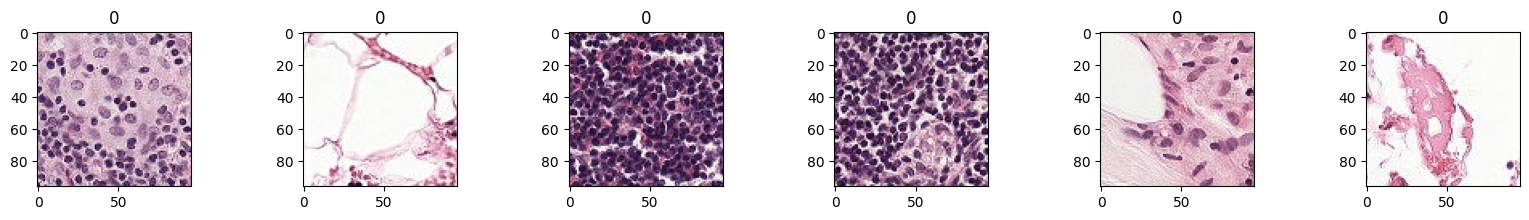

In [11]:
import matplotlib.pyplot as plt

images = [(df['image'][0], df['label'][0]), 
          (df['image'][1], df['label'][1]),
          (df['image'][2], df['label'][2]),
          (df['image'][5000], df['label'][5000]),
          (df['image'][5001], df['label'][5001]),
          (df['image'][5002], df['label'][5002])]

fig, m_axs = plt.subplots(1, len(images), figsize = (20, 2))
#show the images and label them
for ii, c_ax in enumerate(m_axs):
    c_ax.imshow(images[ii][0])
    c_ax.set_title(images[ii][1])

In [12]:
input_images = np.stack(list(df.image), axis = 0)
input_images.shape

(20000, 96, 96, 3)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils


train_fraction = 0.8

encoder = LabelBinarizer()
y = encoder.fit_transform(df.label)
x = input_images

train_tensors, test_tensors, train_targets, test_targets =\
    train_test_split(x, y, train_size = train_fraction, random_state = 42)

val_size = int(0.5*len(test_tensors))

val_tensors = test_tensors[:val_size]
val_targets = test_targets[:val_size]
test_tensors = test_tensors[val_size:]
test_targets = test_targets[val_size:]

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
# from tensorflow.keras import set_random_seed
from tensorflow.keras.applications.resnet50 import ResNet50



np.random.random(7)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
checkpointer = ModelCheckpoint(filepath='weights.hdf5', 
                               verbose=1, save_best_only=True)

resnet50_model = ResNet50(include_top=False,
                          weights='imagenet',
                          input_shape=(96, 96, 3))

for layer in resnet50_model.layers:
    layer.trainable=False
                    

model = Sequential()
model.add(resnet50_model)



model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size = 3)) 

# model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
# model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')) 
# model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size = 3)) 

# model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size = 3))

# model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
# model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'elu'))
# model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'elu'))

model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 3, 3, 16)          294928    
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 16)          2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          2320      
                                                                 
 dropout (Dropout)           (None, 3, 3, 16)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 16)         0         
 )                                                               
                                                        

In [18]:
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 15
history = model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=80, verbose=1, callbacks = [early_stopping, checkpointer])

Epoch 1/15


2023-10-21 12:49:07.320898: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


199/200 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.8036
Epoch 1: val_loss improved from inf to 0.37306, saving model to weights.hdf5
200/200 [==============================] - 15s 43ms/step - loss: 0.4274 - accuracy: 0.8039 - val_loss: 0.3731 - val_accuracy: 0.8245
Epoch 2/15
199/200 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.8492
Epoch 2: val_loss improved from 0.37306 to 0.37176, saving model to weights.hdf5
200/200 [==============================] - 7s 36ms/step - loss: 0.3469 - accuracy: 0.8494 - val_loss: 0.3718 - val_accuracy: 0.8395
Epoch 3/15
199/200 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8631
Epoch 3: val_loss improved from 0.37176 to 0.33433, saving model to weights.hdf5
200/200 [==============================] - 7s 36ms/step - loss: 0.3153 - accuracy: 0.8633 - val_loss: 0.3343 - val_accuracy: 0.8520
Epoch 4/15
199/200 [============================>.] - ETA: 0s - loss: 0.2867 - accuracy

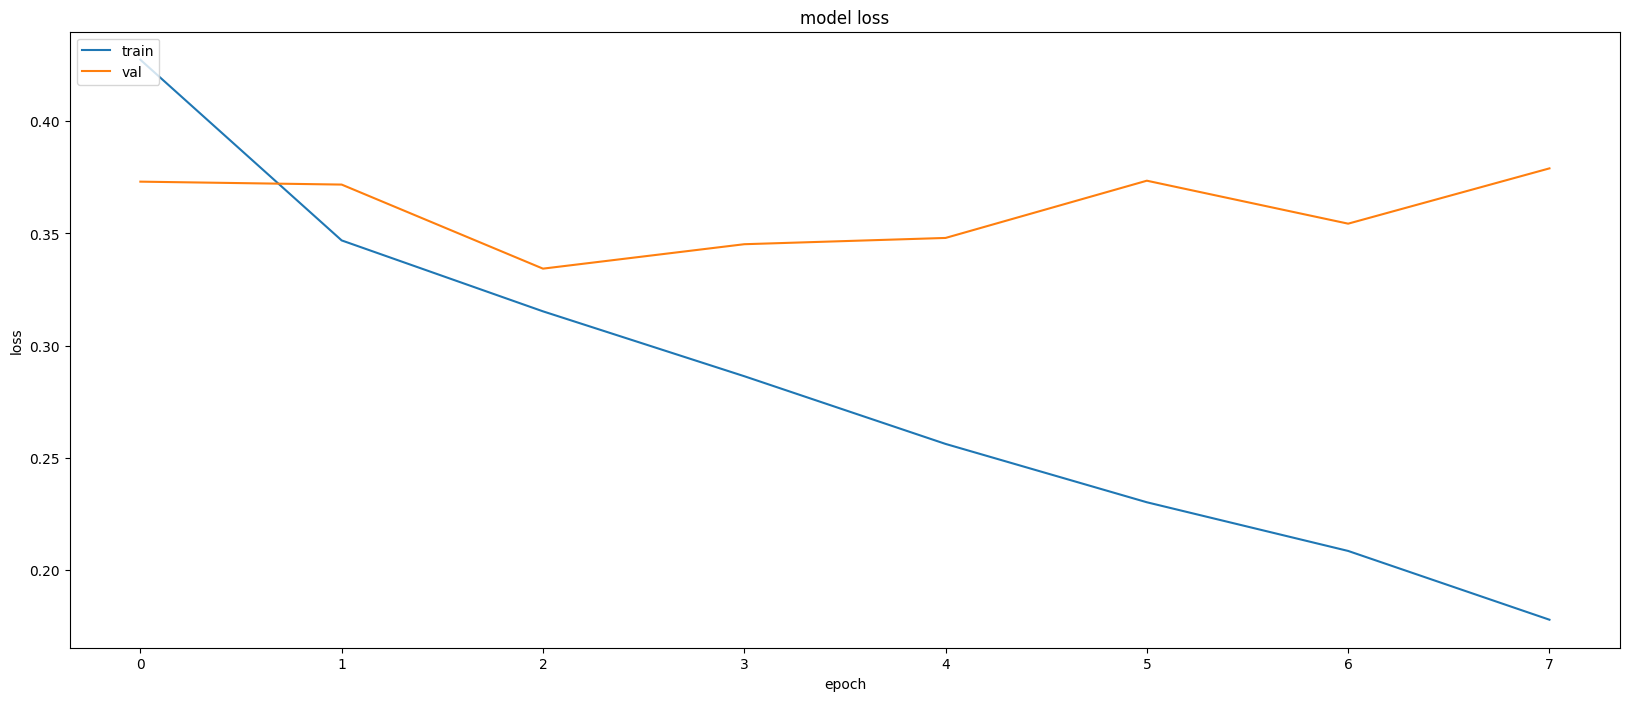

In [19]:
# model = tf.keras.models.load_model("/kaggle/working/modelds.h5")
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

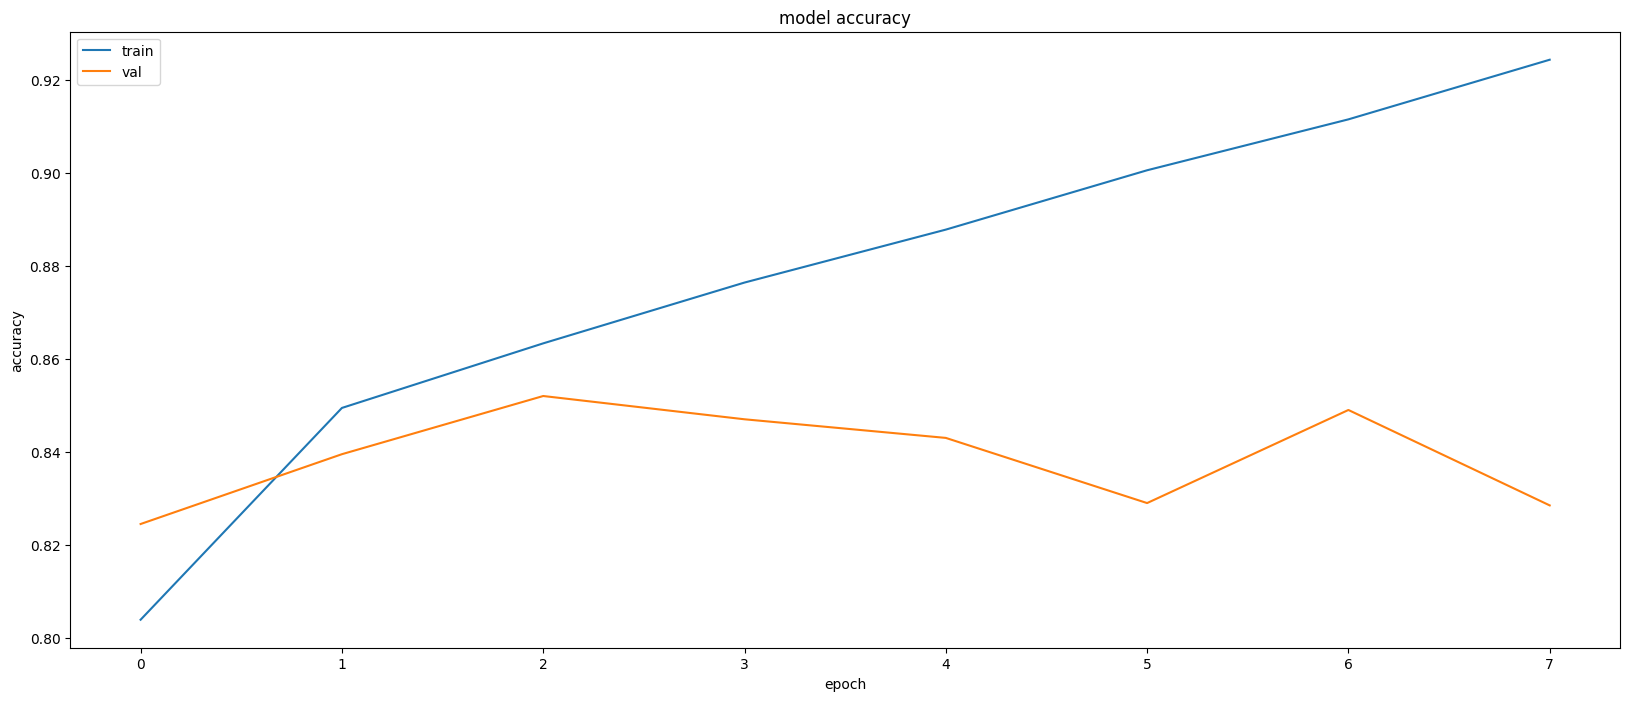

In [23]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
cancer_predictions =  [model.predict(np.expand_dims(tensor, axis=0))[0][0] for tensor in test_tensors]
test_accuracy = 100*np.sum(np.round(cancer_predictions).astype('int32')==test_targets.flatten())/len(cancer_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 [==============================] - 0s 21ms/step
Test accuracy: 83.8500%


In [21]:
#AUC score
from sklearn.metrics import roc_auc_score
score = roc_auc_score(np.round(cancer_predictions).astype('int32'), test_targets)
score

0.8436190476190476

In [22]:
from sklearn.metrics import classification_report 
print(classification_report(np.round(cancer_predictions).astype('int32'),test_targets))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       875
           1       0.90      0.80      0.85      1125

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.84      0.84      2000

